In [ ]:
########### Basic Parameters for Running: ################################

TFlite_Version  = "1701"
TFlite_MainType = "dig-class11"
TFlite_Size     = "s2"
Training_Percentage = 0.8              # 0.0 = Use all Images for Training
Epoch_Anz = 500

##########################################################################


import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from sklearn.utils import shuffle
from tensorflow.python import keras
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical
from PIL import Image
from pathlib import Path

loss_ges = np.array([])
val_loss_ges = np.array([])

%matplotlib inline
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the path to the parent directory containing the folders
parent_dir = '/content/drive/MyDrive/Colab Notebooks/digitcongto'


# Define the list of folders containing the images
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Initialize the list to store the images and labels
images = []
labels = []

# Loop through each folder and load the images
for i, folder in enumerate(folders):
    folder_path = os.path.join(parent_dir, folder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        images.append(img)
        labels.append(int(folder))

In [ ]:
# Convert the lists to NumPy arrays
x_data = np.array(images)
y_data = np.array(labels)
y_data = to_categorical(y_data, 10)
print(x_data.shape)
print(y_data.shape)
x_data, y_data = shuffle(x_data, y_data)
x_data = x_data.reshape((x_data.shape[0], x_data.shape[1], x_data.shape[2], 1))
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

(1197, 28, 28)
(1197, 10)


In [ ]:
X_train[1]

array([[[ 88],
        [ 84],
        [ 82],
        [ 81],
        [ 80],
        [ 82],
        [ 84],
        [ 84],
        [ 84],
        [ 83],
        [ 83],
        [ 83],
        [ 83],
        [ 82],
        [ 82],
        [ 83],
        [ 80],
        [ 80],
        [ 80],
        [ 79],
        [ 79],
        [ 81],
        [ 83],
        [ 84],
        [ 85],
        [ 85],
        [ 85],
        [ 85]],

       [[ 84],
        [ 84],
        [ 84],
        [ 82],
        [ 81],
        [ 81],
        [ 82],
        [ 80],
        [ 76],
        [ 73],
        [ 70],
        [ 73],
        [ 78],
        [ 78],
        [ 84],
        [ 78],
        [ 81],
        [ 76],
        [ 78],
        [ 77],
        [ 76],
        [ 80],
        [ 84],
        [ 84],
        [ 85],
        [ 85],
        [ 84],
        [ 84]],

       [[ 85],
        [ 86],
        [ 85],
        [ 80],
        [ 82],
        [ 81],
        [ 77],
        [ 77],
        [ 80],
        [ 85],
      

In [ ]:
inputs = tf.keras.Input(shape=(28, , 3))
inputs2 = tf.keras.layers.BatchNormalization()(inputs)
inputs3 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu")(inputs2)
inputs4 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(inputs3)
inputs5 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu")(inputs4)
inputs6 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(inputs5)
inputs7 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu")(inputs6)
inputs8 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(inputs7)
inputs9 = tf.keras.layers.Flatten()(inputs8)
inputs10 = tf.keras.layers.Dense(256,activation="relu")(inputs9)
output = tf.keras.layers.Dense(10, activation='softmax')(inputs10)

model = tf.keras.Model(inputs=inputs, outputs=output)

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95), metrics = ["accuracy"])

model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0     

# Training
The input pictures are randomly scattered for brightness, pixel shift variations and rotation angle. This is implemented with a ImageDataGenerator.


In [ ]:
Batch_Size = 4
Shift_Range = 1
Brightness_Range = 0.2
Rotation_Angle = 5
ZoomRange = 0.3


datagen = ImageDataGenerator(width_shift_range=[-Shift_Range,Shift_Range],
                             height_shift_range=[-Shift_Range,Shift_Range],
                             brightness_range=[1-Brightness_Range,1+Brightness_Range],
                             zoom_range=[1-ZoomRange, 1+ZoomRange],
                             rotation_range=Rotation_Angle)

if (Training_Percentage > 0):
    train_iterator = datagen.flow(x_data, y_data, batch_size=Batch_Size)
    validation_iterator = datagen.flow(X_test, y_test, batch_size=Batch_Size)
    history = model.fit(train_iterator, validation_data = validation_iterator, epochs = 100)
else:
    train_iterator = datagen.flow(x_data, y_data, batch_size=Batch_Size)
    history = model.fit(train_iterator, epochs = 100)



Epoch 1/100
300/300 [==============================] - 8s 13ms/step - loss: 1.6572 - accuracy: 0.4461 - val_loss: 1.0225 - val_accuracy: 0.7042
Epoch 2/100
300/300 [==============================] - 3s 11ms/step - loss: 0.7157 - accuracy: 0.7736 - val_loss: 0.7289 - val_accuracy: 0.7875
Epoch 3/100
300/300 [==============================] - 2s 7ms/step - loss: 0.6179 - accuracy: 0.8145 - val_loss: 0.5967 - val_accuracy: 0.8125
Epoch 4/100
300/300 [==============================] - 3s 10ms/step - loss: 0.5411 - accuracy: 0.8304 - val_loss: 0.6972 - val_accuracy: 0.7917
Epoch 5/100
300/300 [==============================] - 2s 7ms/step - loss: 0.4808 - accuracy: 0.8496 - val_loss: 0.5177 - val_accuracy: 0.8292
Epoch 6/100
300/300 [==============================] - 2s 7ms/step - loss: 0.4281 - accuracy: 0.8605 - val_loss: 0.3516 - val_accuracy: 0.8708
Epoch 7/100
300/300 [==============================] - 2s 7ms/step - loss: 0.4150 - accuracy: 0.8705 - val_loss: 0.5037 - val_accuracy: 0.8

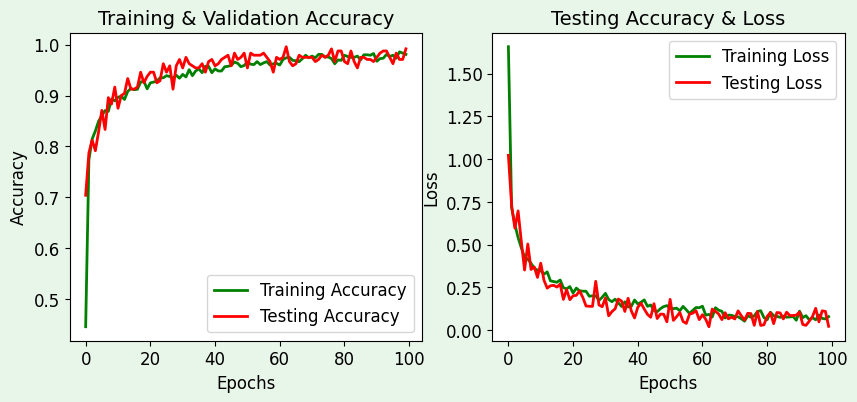

In [ ]:
import matplotlib.pyplot as plt

# Set up data and plot
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(10, 4)

# Adjust plot appearance
fig.patch.set_facecolor('#E8F5E9')  # Light green background color
plt.rcParams.update({'font.size': 12})  # Adjust font size

# Plot training and validation accuracy
ax[0].plot(epochs , train_acc , 'g-' , label = 'Training Accuracy', linewidth=2)
ax[0].plot(epochs , val_acc , 'r-' , label = 'Testing Accuracy', linewidth=2)
ax[0].set_title('Training & Validation Accuracy', color='black', fontsize=14)
ax[0].legend()
ax[0].set_xlabel("Epochs", color='black', fontsize=12)
ax[0].set_ylabel("Accuracy", color='black', fontsize=12)
ax[0].tick_params(axis='both', colors='black')

# Plot training and validation loss
ax[1].plot(epochs , train_loss , 'g-' , label = 'Training Loss', linewidth=2)
ax[1].plot(epochs , val_loss , 'r-' , label = 'Testing Loss', linewidth=2)
ax[1].set_title('Testing Accuracy & Loss', color='black', fontsize=14)
ax[1].legend()
ax[1].set_xlabel("Epochs", color='black', fontsize=12)
ax[1].set_ylabel("Loss", color='black', fontsize=12)
ax[1].tick_params(axis='both', colors='black')

plt.show()


In [ ]:
# predicted values
y_pred_enc = model.predict(X_test)

# actual
y_act = [np.argmax(i) for i in y_test]
# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]


8/8 [==============================] - 0s 3ms/step


In [ ]:
# for numerical analysis
import numpy as np
# to store and process in a dataframe
import pandas as pd

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report


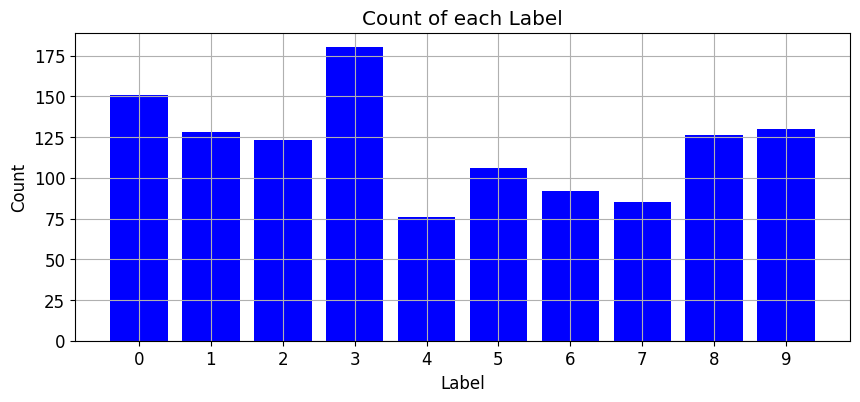

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_data contains one-hot encoded labels
# You might need to convert it back to single labels if it's one-hot encoded
# Assuming each label represents a digit from 0 to 9

# Calculate the count of each label
label_counts = np.sum(y_data, axis=0)

# Define labels
labels = np.arange(10)  # Assuming you have 10 classes (digits from 0 to 9)

# Define colors for the bars
colors = ['blue']

# Plotting
plt.figure(figsize=(10, 4))
plt.bar(labels, label_counts, color=colors)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of each Label')
plt.xticks(labels)
plt.grid(True)
plt.show()



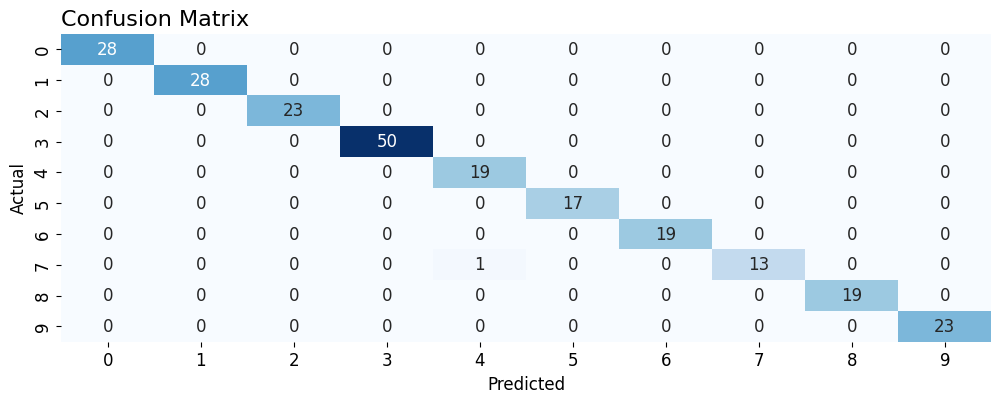

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Tính confusion matrix
cm = confusion_matrix(y_act, y_pred)

# Tính accuracy
accuracy = accuracy_score(y_act, y_pred)

# Tính precision
precision = precision_score(y_act, y_pred, average='macro')  # Thay đổi average thành 'macro'

# Tính recall
recall = recall_score(y_act, y_pred, average='macro')  # Thay đổi average thành 'macro'

# Tính F1-score
f1 = f1_score(y_act, y_pred, average='macro')  # Thay đổi average thành 'macro'

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9958333333333333
Precision: 0.9949999999999999
Recall: 0.9928571428571429
F1-score: 0.9937321937321937


### Learing result

* Visualization of the training and validation results

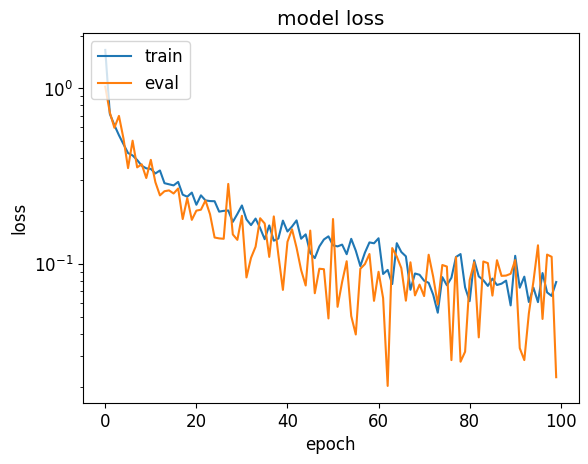

In [ ]:
loss_ges = np.append(loss_ges, history.history['loss'])
plt.semilogy(history.history['loss'])

if (Training_Percentage > 0):
    val_loss_ges = np.append(val_loss_ges, history.history['val_loss'])
    plt.semilogy(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','eval'], loc='upper left')
plt.show()

### Check the model by hand

* The following code uses the trained model to check the deviation for each picture.
* x-axis walks through each pixel, y-axis shows the result

### Check each image for expected and deviation
* setting the switch "only_deviation = true" will only print the images for which the classification and the CNN-result deviates

The output contains the following information:

| Filename      | Expected Category           | Predicted Category        |
|------------- |:-----------------------------:|--------------|
| ziffer_sortiert_resize_NaN/5\Ziffer_4_0034.jpg | 4  | -1 |


### Save the model

* Save the model to the file with the "h5" file format

In [ ]:
FileName = TFlite_MainType + "_" + TFlite_Version + "_" + TFlite_Size


converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open(FileName + ".tflite", "wb").write(tflite_model)

386032

In [ ]:
FileName = TFlite_MainType + "_" + TFlite_Version + "_" + TFlite_Size + "_q.tflite"

import tensorflow as tf

def representative_dataset():
    for n in range(x_data[0].size):
      data = np.expand_dims(x_data[5], axis=0)
      yield [data.astype(np.float32)]

converter2 = tf.lite.TFLiteConverter.from_keras_model(model)
converter2.representative_dataset = representative_dataset
converter2.optimizations = [tf.lite.Optimize.DEFAULT]
converter2.representative_dataset = representative_dataset
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
tflite_quant_model = converter2.convert()

open(FileName, "wb").write(tflite_quant_model)
print(FileName)
Path(FileName).stat().st_size

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


dig-class11_1701_s2_q.tflite


104480

In [ ]:
!xxd -i dig-class11_1701_s2_q.tflite > model.cc

Checking the images shows, that this are border line images, which can be interpreted as a good digit or a faulty one.